In [27]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

### Load the data and prepare for the analysis

In [28]:
df = pd.read_csv("features_reads_relative_abundance.tsv", sep="\t")
df_transposed = df.set_index(df.columns[0]).T
df_transposed.columns.name = None  # Remove the name of the columns index
df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'sample'}, inplace=True)
df_transposed

,sample,ivig_1,ivig_2,ivig_3,ivig_6,ivig_7,ivig_8,ivig_9,ivig_10,ivig_12,...,uvig_598886,uvig_598887,uvig_598889,uvig_598890,uvig_598893,uvig_598938,uvig_598939,uvig_598940,uvig_598943,uvig_598946
0,C102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,C103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,C104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.812242e-07,0.0,0.0,0.0
3,C105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
4,C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,P88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
132,P9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
133,P94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
134,P95II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0


In [29]:
# Create a new column mentioned the group (condition) of each sample
# If sample column startswith "C" then the new condition column will be 0 (Control, let's keep it binary)
# If samples column startswith "P" then the new condition column will be 1 (Parkinson, let's keep it binary)
df_transposed['condition'] = df_transposed['sample'].apply(lambda x: 0 if x.startswith('C') else 1)

In [30]:
df_transposed

,sample,ivig_1,ivig_2,ivig_3,ivig_6,ivig_7,ivig_8,ivig_9,ivig_10,ivig_12,...,uvig_598887,uvig_598889,uvig_598890,uvig_598893,uvig_598938,uvig_598939,uvig_598940,uvig_598943,uvig_598946,condition
0,C102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0
1,C103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0
2,C104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.812242e-07,0.0,0.0,0.0,0
3,C105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0
4,C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,P88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1
132,P9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1
133,P94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1
134,P95II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1


### Split the data into features and labels (X (feature matrix) and y (label vector))

In [31]:
var_names = df_transposed.columns.tolist()[1:-1]
X = df_transposed.iloc[:,1:-1]
y = df_transposed.iloc[:,-1]

# the data is already normalized (we work), so we can skip normalization
# the label vector is also binary (0: Control, 1:Parkinson), so we can skip encoding
X = np.array(X)
y = np.array(y)

### Random Forest Classification with 5-fold cross-validation

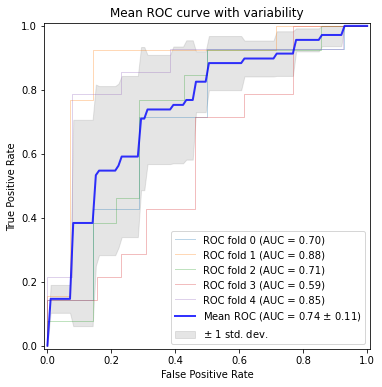

In [32]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=10, random_state=6969)

tprs = []
aucs = []
f1s = []
recalls = []
precisions = []
accuracies = []
feature_importances = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = sklearn.metrics.RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    preds = classifier.predict(X[test])
    f1_scoring = f1_score(y[test], preds)
    recall_scoring = recall_score(y[test], preds)
    precision_scoring = precision_score(y[test], preds)
    accuracy_scoring = accuracy_score(y[test], preds)
    f1s.append(f1_scoring)
    recalls.append(recall_scoring)
    precisions.append(precision_scoring)
    accuracies.append(accuracy_scoring)
    fold_importances = classifier.feature_importances_
    feature_importances.append(fold_importances)


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC curve with variability"
)
ax.legend(loc="lower right")
plt.show()

In [33]:
# print all the metrics (aucs, f1s, recalls, precisions, accuracies)
print(f"All AUCs: {aucs}")
print(f"Mean AUC: {np.mean(aucs)}")
print(f"Std AUC: {np.std(aucs)}")

print(f"All F1s: {f1s}")
print(f"Mean F1: {np.mean(f1s)}")
print(f"Std F1: {np.std(f1s)}")

print(f"All Recalls: {recalls}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Std Recall: {np.std(recalls)}")

print(f"All Precisions: {precisions}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Std Precision: {np.std(precisions)}")

print(f"All Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Std Accuracy: {np.std(accuracies)}")


All AUCs: [0.7040816326530612, 0.8791208791208791, 0.7142857142857143, 0.5879120879120878, 0.8461538461538463]
Mean AUC: 0.7463108320251177
Std AUC: 0.10536243321250749
All F1s: [0.7142857142857143, 0.8571428571428571, 0.5833333333333334, 0.46153846153846156, 0.8]
Mean F1: 0.6832600732600733
Std F1: 0.14420253110395653
All Recalls: [0.7142857142857143, 0.9230769230769231, 0.5384615384615384, 0.42857142857142855, 0.8571428571428571]
Mean Recall: 0.6923076923076923
Std Recall: 0.18661916233278047
All Precisions: [0.7142857142857143, 0.8, 0.6363636363636364, 0.5, 0.75]
Mean Precision: 0.6801298701298701
Std Precision: 0.10467049068790443
All Accuracies: [0.7142857142857143, 0.8518518518518519, 0.6296296296296297, 0.48148148148148145, 0.7777777777777778]
Mean Accuracy: 0.691005291005291
Std Accuracy: 0.12775778431988632


### Check which feature was the most usefull for the data using feature_importances

In [34]:
feature_importances_df = pd.DataFrame(feature_importances, columns=var_names)
feature_importances_mean = feature_importances_df.mean()
feature_importances_std = feature_importances_df.std()


In [35]:
#get the top 50 features
top50 = feature_importances_mean.sort_values(ascending=False).head(50)
print(top50.head(5))
#get only the names
top50_names = top50.index.tolist()

uvig_130451    0.002362
uvig_463921    0.002079
uvig_187852    0.001841
uvig_312390    0.001840
uvig_114087    0.001796
dtype: float64


### Re-run the model with only top50 phages. (top feature importances)

In [36]:
#modify the df_transposed dataframe, so that we have only the columns of top50_names
df_transposed_top50 = df_transposed[['sample'] + top50_names + ['condition']]

In [37]:
df_transposed_top50

,sample,uvig_130451,uvig_463921,uvig_187852,uvig_312390,uvig_114087,uvig_137940,uvig_145736,uvig_132349,uvig_12046,...,uvig_134234,uvig_361772,uvig_397663,uvig_413387,uvig_320542,uvig_219647,uvig_69625,uvig_438986,uvig_137525,condition
0,C102,0.000007,5.515571e-05,0.000405,1.145542e-07,4.004516e-07,0.000021,0.000001,0.000033,6.089803e-07,...,7.244294e-07,2.078320e-04,9.301981e-06,0.000000,0.000045,0.000018,3.378142e-05,0.000002,5.268122e-05,0
1,C103,0.000059,2.110598e-05,0.000010,4.173960e-06,3.789891e-07,0.000007,0.000051,0.000002,6.051587e-05,...,3.283678e-06,1.096942e-05,1.311150e-06,0.000000,0.000005,0.000215,0.000000e+00,0.000190,8.617387e-06,0
2,C104,0.000151,6.040218e-07,0.000010,9.266622e-07,2.313836e-07,0.000027,0.000131,0.000009,8.436154e-05,...,3.778237e-06,5.715666e-06,7.004325e-06,0.000009,0.000014,0.000434,3.539739e-07,0.000121,5.918804e-05,0
3,C105,0.000042,4.292100e-06,0.000007,6.285435e-06,0.000000e+00,0.000010,0.000072,0.000008,4.057408e-05,...,7.471520e-07,3.356593e-07,6.980983e-06,0.000000,0.000012,0.000247,8.231866e-06,0.000270,3.122507e-05,0
4,C1,0.000045,2.512537e-05,0.000079,5.870298e-06,2.963099e-06,0.000002,0.000042,0.000004,3.288484e-05,...,6.260731e-06,7.991182e-05,9.814913e-07,0.000002,0.000079,0.000157,9.644660e-07,0.000281,5.733993e-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,P88,0.000174,7.617661e-07,0.000032,1.636133e-05,1.139522e-04,0.000009,0.000192,0.000077,1.879353e-04,...,3.889754e-07,2.217114e-05,2.019097e-06,0.000000,0.000067,0.000575,9.374747e-06,0.000749,2.032014e-05,1
132,P9,0.000579,1.845396e-05,0.000010,1.107830e-05,3.073561e-07,0.000000,0.000478,0.000031,5.635757e-04,...,8.603626e-06,8.002639e-05,0.000000e+00,0.000000,0.000026,0.001780,0.000000e+00,0.000697,4.367879e-07,1
133,P94,0.000032,2.473077e-05,0.000042,3.942645e-06,3.424214e-07,0.000011,0.000031,0.000047,2.460458e-05,...,1.141094e-06,1.761340e-04,2.369281e-06,0.000002,0.000003,0.000073,0.000000e+00,0.000524,3.552325e-05,1
134,P95II,0.000752,4.176108e-05,0.000031,0.000000e+00,3.332810e-07,0.000000,0.000676,0.000025,7.885034e-04,...,1.110634e-07,1.043646e-04,0.000000e+00,0.000000,0.000039,0.002328,0.000000e+00,0.000002,0.000000e+00,1


In [38]:
var_names = df_transposed.columns.tolist()[1:-1]
X_top50 = df_transposed_top50.iloc[:,1:-1]
y_top50 = df_transposed_top50.iloc[:,-1]

# the data is already normalized (we work), so we can skip normalization
# the label vector is also binary (0: Control, 1:Parkinson), so we can skip encoding
X_top50 = np.array(X_top50)
y_top50 = np.array(y_top50)

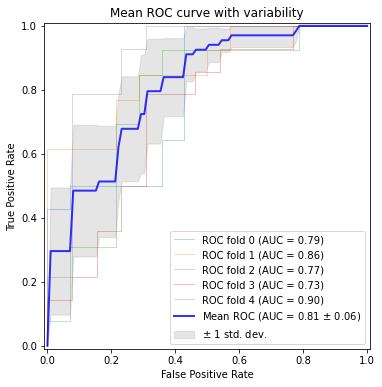

In [39]:
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=10, random_state=6969)

tprs = []
aucs = []
f1s = []
recalls = []
precisions = []
accuracies = []
feature_importances = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X_top50, y_top50)):
    classifier.fit(X_top50[train], y_top50[train])
    viz = sklearn.metrics.RocCurveDisplay.from_estimator(
        classifier,
        X_top50[test],
        y_top50[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    preds = classifier.predict(X_top50[test])
    f1_scoring = f1_score(y_top50[test], preds)
    recall_scoring = recall_score(y_top50[test], preds)
    precision_scoring = precision_score(y_top50[test], preds)
    accuracy_scoring = accuracy_score(y_top50[test], preds)
    f1s.append(f1_scoring)
    recalls.append(recall_scoring)
    precisions.append(precision_scoring)
    accuracies.append(accuracy_scoring)
    fold_importances = classifier.feature_importances_
    feature_importances.append(fold_importances)


mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mean ROC curve with variability"
)
ax.legend(loc="lower right")
plt.show()

In [40]:
# print all the metrics (aucs, f1s, recalls, precisions, accuracies)
print(f"All AUCs: {aucs}")
print(f"Mean AUC: {np.mean(aucs)}")
print(f"Std AUC: {np.std(aucs)}")

print(f"All F1s: {f1s}")
print(f"Mean F1: {np.mean(f1s)}")
print(f"Std F1: {np.std(f1s)}")

print(f"All Recalls: {recalls}")
print(f"Mean Recall: {np.mean(recalls)}")
print(f"Std Recall: {np.std(recalls)}")

print(f"All Precisions: {precisions}")
print(f"Mean Precision: {np.mean(precisions)}")
print(f"Std Precision: {np.std(precisions)}")

print(f"All Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies)}")
print(f"Std Accuracy: {np.std(accuracies)}")

All AUCs: [0.7908163265306122, 0.8626373626373627, 0.7692307692307693, 0.7252747252747253, 0.9010989010989011]
Mean AUC: 0.8098116169544742
Std AUC: 0.06368365562458478
All F1s: [0.6666666666666666, 0.72, 0.7586206896551724, 0.5833333333333334, 0.8387096774193549]
Mean F1: 0.7134660734149055
Std F1: 0.08589797019903744
All Recalls: [0.7142857142857143, 0.6923076923076923, 0.8461538461538461, 0.5, 0.9285714285714286]
Mean Recall: 0.7362637362637363
Std Recall: 0.1464880917317192
All Precisions: [0.625, 0.75, 0.6875, 0.7, 0.7647058823529411]
Mean Precision: 0.7054411764705882
Std Precision: 0.049638833999505354
All Accuracies: [0.6428571428571429, 0.7407407407407407, 0.7407407407407407, 0.6296296296296297, 0.8148148148148148]
Mean Accuracy: 0.7137566137566138
Std Accuracy: 0.06895379706939642


### Load the publicly available data for testing

Twenty random samples (10 Parkinson's disease, 10 control) were selected from publicly available shotgun metagenomics data within the ENA project PRJNA834801. The sequences were mapped to GDP data, which was subsequently employed as a test dataset to evaluate our model's performance on unseen data.

In [41]:
test_set_data = pd.read_csv("validation_public_data/features_reads_relative_abundance.tsv", sep="\t")
test_set_data
metadata_for_test = pd.read_csv("validation_public_data/metadata.csv", sep="\t")

In [42]:
test_set_data_t = test_set_data.set_index(df.columns[0]).T
test_set_data_t.columns.name = None  # Remove the name of the columns index
test_set_data_t.reset_index(inplace=True)
test_set_data_t.rename(columns={'index': 'sample'}, inplace=True)

In [43]:
test_set_data_t["Condition"] = metadata_for_test["Condition"]

### Split the test data into features and labels (X (feature matrix) and y (label vector))

In [44]:
X_test = test_set_data_t.iloc[:,1:-1]
y_test = test_set_data_t.iloc[:,-1]

# the data is already normalized (we work), so we can skip normalization
# the label vector is also binary (0: Control, 1:Parkinson), so we can skip encoding
X_test = np.array(X_test)
y_test = np.array(y_test)

### Run the Random forest model trained by all our data (136 samples)

In [45]:
classifier = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=10, random_state=6969)
classifier.fit(X,y)
preds = classifier.predict(X_test)
probs = classifier.predict_proba(X_test)[:, 1]

### Get the recall, precision, accuracy, and f1-score, auc

In [46]:
recall_scoring = recall_score(y_test, preds)
precision_scoring = precision_score(y_test, preds)
accuracy_scoring = accuracy_score(y_test, preds)
f1_scoring = f1_score(y_test, preds)
auc_binary = roc_auc_score(y_test, preds)
auc_prob = roc_auc_score(y_test, probs)
print(f"Recall: {recall_scoring}")
print(f"Precision: {precision_scoring}")
print(f"Accuracy: {accuracy_scoring}")
print(f"F1: {f1_scoring}")
print(f"AUC: {auc_binary}")
print(f"AUC prob: {auc_prob}")

Recall: 0.8
Precision: 0.8
Accuracy: 0.8
F1: 0.8
AUC: 0.8
AUC prob: 0.74


In [47]:
# get the feature importances
feature_importances = classifier.feature_importances_
feature_importances_df = pd.DataFrame(feature_importances, index=var_names, columns=["importance"])
feature_importances_df = feature_importances_df.sort_values(by="importance", ascending=False)

In [48]:
#get the top 50 features
top50 = feature_importances_mean.sort_values(ascending=False).head(50)
print(top50.head(5))
#get only the names
top50_names = top50.index.tolist()

uvig_130451    0.002362
uvig_463921    0.002079
uvig_187852    0.001841
uvig_312390    0.001840
uvig_114087    0.001796
dtype: float64


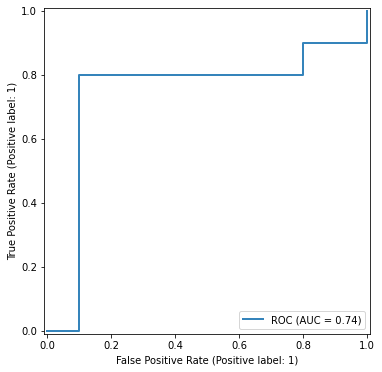

In [49]:
# create figure for true positive rate false positive rate
fig, ax = plt.subplots(figsize=(6, 6))
viz = sklearn.metrics.RocCurveDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    name="ROC",
    alpha=0.9,
    lw=2,
    ax=ax
)

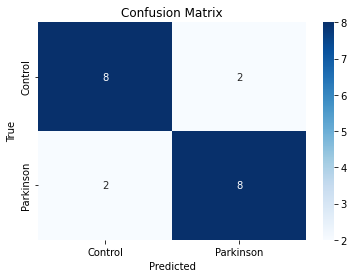

In [50]:
# get confusion matrix and plot it
# 0: Control, 1: Parkinson, so mark the labels accordingly
labels = ["Control", "Parkinson"]
conf_matrix = confusion_matrix(y_test, preds)
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



### Test also the top50 features with the test data

In [64]:
#modify the df_transposed dataframe, so that we have only the columns of top50_names
df_transposed_top50 = df_transposed[['sample'] + top50_names + ['condition']]
var_names = df_transposed.columns.tolist()[1:-1]
X_top50 = df_transposed_top50.iloc[:,1:-1]
y_top50 = df_transposed_top50.iloc[:,-1]

# the data is already normalized (we work), so we can skip normalization
# the label vector is also binary (0: Control, 1:Parkinson), so we can skip encoding
X_top50 = np.array(X_top50)
y_top50 = np.array(y_top50)

In [65]:
#modify the test_set_data_t dataframe, so that we have only the columns of top50_names
test_set_data_t_top50 = test_set_data_t[['sample'] + top50_names + ['Condition']]

In [66]:
test_set_data_t_top50

,sample,uvig_130451,uvig_463921,uvig_187852,uvig_312390,uvig_114087,uvig_137940,uvig_145736,uvig_132349,uvig_12046,...,uvig_134234,uvig_361772,uvig_397663,uvig_413387,uvig_320542,uvig_219647,uvig_69625,uvig_438986,uvig_137525,Condition
0,SRR19064617,2.761139e-05,1.145220e-05,0.000016,0.000000e+00,0.000000e+00,0.000000e+00,1.574479e-05,5.696992e-06,2.257185e-05,...,9.327178e-05,0.000036,0.000000e+00,0.000000,2.253312e-05,0.000089,8.948422e-07,0.000000e+00,2.493779e-06,1
1,SRR19064646,7.967294e-05,4.496789e-05,0.000021,1.990029e-07,9.938034e-08,2.361245e-07,6.493877e-05,1.873388e-06,6.294609e-05,...,2.268567e-04,0.000619,0.000000e+00,0.000000,1.065286e-06,0.000191,0.000000e+00,1.118680e-06,0.000000e+00,0
2,SRR19064776,7.445400e-06,1.860474e-06,0.000006,7.224828e-06,0.000000e+00,0.000000e+00,1.091487e-05,1.007609e-06,4.267538e-06,...,4.755943e-05,0.000016,0.000000e+00,0.000000,0.000000e+00,0.000030,0.000000e+00,2.490553e-04,3.038461e-06,1
3,SRR19064906,1.903363e-06,2.225887e-05,0.000023,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.927477e-06,...,2.549130e-05,0.000020,0.000000e+00,0.000000,6.212381e-05,0.000002,7.525574e-07,1.216252e-05,6.291764e-06,0
4,SRR19065013,7.119288e-05,4.570029e-06,0.000008,0.000000e+00,0.000000e+00,2.302060e-05,6.723775e-05,2.275927e-06,3.855703e-05,...,4.043501e-05,0.000047,9.241445e-06,0.000000,4.853197e-07,0.000208,1.080502e-05,2.613751e-05,3.294284e-05,1
5,SRR19064398,5.754285e-06,8.896971e-06,0.000010,0.000000e+00,0.000000e+00,5.521174e-06,1.150325e-05,3.737978e-05,1.071924e-05,...,5.131524e-05,0.000065,1.071902e-06,0.000005,1.411510e-05,0.000027,3.317922e-06,9.827749e-05,9.246506e-06,1
6,SRR19064343,3.027243e-05,1.473418e-04,0.000004,1.583978e-05,0.000000e+00,4.556245e-07,2.705459e-05,1.807439e-06,2.092385e-05,...,1.022461e-05,0.000009,9.951380e-07,0.000000,2.633698e-05,0.000088,0.000000e+00,4.308718e-04,7.903024e-06,1
7,SRR19064416,1.539081e-05,1.927316e-05,0.000008,3.145370e-05,0.000000e+00,2.416469e-05,6.293326e-06,8.520897e-07,1.563841e-05,...,7.975988e-05,0.000124,2.032951e-05,0.000000,1.241617e-05,0.000031,0.000000e+00,7.068954e-04,5.171098e-05,0
8,SRR19064446,1.544511e-04,2.005646e-05,0.000000,1.825894e-05,1.266439e-07,1.323968e-05,1.311835e-04,4.933805e-06,1.004366e-04,...,1.916022e-05,0.000175,1.862082e-06,0.000000,1.052087e-05,0.000347,0.000000e+00,4.928413e-04,2.213697e-05,0
9,SRR19064508,7.665610e-07,1.249864e-05,0.000773,0.000000e+00,0.000000e+00,5.884055e-07,1.838895e-06,1.111378e-03,2.636255e-06,...,3.301084e-07,0.000094,0.000000e+00,0.000000,8.229310e-05,0.000001,0.000000e+00,5.973582e-07,0.000000e+00,1


In [67]:
X_test_top50 = test_set_data_t_top50.iloc[:,1:-1]
y_test_top50 = test_set_data_t_top50.iloc[:,-1]

# the data is already normalized (we work), so we can skip normalization
# the label vector is also binary (0: Control, 1:Parkinson), so we can skip encoding
X_test_top50 = np.array(X_test_top50)
y_test_top50 = np.array(y_test_top50)

In [69]:
classifier = RandomForestClassifier(max_depth=5, n_estimators=100, min_samples_split=10, random_state=6969)
classifier.fit(X_top50,y_top50)
preds_top50 = classifier.predict(X_test_top50)
probs_top50 = classifier.predict_proba(X_test_top50)[:, 1]

In [70]:
recall_scoring = recall_score(y_test, preds_top50)
precision_scoring = precision_score(y_test, preds_top50)
accuracy_scoring = accuracy_score(y_test, preds_top50)
f1_scoring = f1_score(y_test, preds_top50)
auc_binary = roc_auc_score(y_test, preds_top50)
auc_prob = roc_auc_score(y_test, probs_top50)
print(f"Recall: {recall_scoring}")
print(f"Precision: {precision_scoring}")
print(f"Accuracy: {accuracy_scoring}")
print(f"F1: {f1_scoring}")
print(f"AUC: {auc_binary}")
print(f"AUC prob: {auc_prob}")

Recall: 0.5
Precision: 0.5555555555555556
Accuracy: 0.55
F1: 0.5263157894736842
AUC: 0.5499999999999999
AUC prob: 0.63


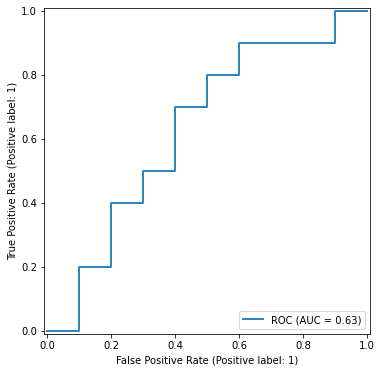

In [71]:
# create figure for true positive rate false positive rate
fig, ax = plt.subplots(figsize=(6, 6))
viz = sklearn.metrics.RocCurveDisplay.from_estimator(
    classifier,
    X_test_top50,
    y_test_top50,
    name="ROC",
    alpha=0.9,
    lw=2,
    ax=ax
)

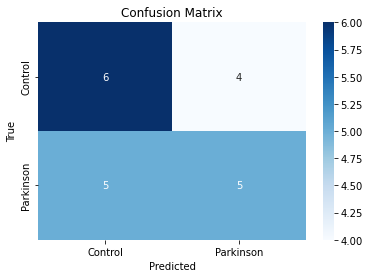

In [72]:
# get confusion matrix and plot it
# 0: Control, 1: Parkinson, so mark the labels accordingly
labels = ["Control", "Parkinson"]
conf_matrix = confusion_matrix(y_test_top50, preds_top50)
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
